In [1]:
import tensorflow as tf
import numpy as np

In [2]:
## Data load
##train, validation, test set
##check data

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/",reshape=False)

x_train = mnist.train.images
y_train = mnist.train.labels

x_validation = mnist.validation.images
y_validation = mnist.validation.labels

x_test = mnist.test.images
y_test = mnist.test.labels

print(len(x_train)==len(y_train),len(x_train))
print(len(x_validation)==len(y_validation),len(x_validation))
print(len(x_test)==len(y_test),len(x_test))

print("image shape : {}".format(x_train[0].shape))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
True 55000
True 5000
True 10000
image shape : (28, 28, 1)


In [3]:
## mnist images = 28*2*1
## LeNet input images = 32*32*color channels
## np.pad => top,bottom,right,letf padding

x_train = np.pad(x_train,((0,0),(2,2),(2,2),(0,0)),'constant')
x_validation = np.pad(x_validation,((0,0),(2,2),(2,2),(0,0)),'constant')
x_test = np.pad(x_test,((0,0),(2,2),(2,2),(0,0)),'constant')

print("image shape : {}".format(x_train[0].shape))

image shape : (32, 32, 1)


3


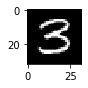

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0,len(x_train))
image = x_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image,cmap="gray")
print(y_train[index])

In [5]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)

In [6]:
epoch = 10
batch_size = 128

In [7]:
# LeNet-5 
# input = 32*32*c images
# Layer1 conv(output 28*28*6) => activation => pooling(14*14*6)
# Layer2 conv(output 10*10*16) => activation => pooling(5*5*16)
# flatten
# fully connect -> 120 outputs
# activation
# fully connect -> 84 outputs
# activation
# fully connect -> (logits) = 10 outputs



## average pooling -> max pooling
## sigmoid -> relu !

In [8]:
from tensorflow.contrib.layers import flatten
# LeNet class

def LeNet5(x):
    # layer 1 : conv // input 32*32*1 // output 28*28*6
    conv1_w = tf.Variable(tf.random_normal(shape=[5,5,1,6]))
    conv1_b = tf.Variable(tf.random_normal(shape=[6]))
    conv1 = tf.nn.conv2d(x,conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    
    # pooling // input 28*28*8 // output = 14*14*6
    pool_1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    # layer 2 : conv // input 14*14*6 // output 10*10*16
    conv2_w = tf.Variable(tf.random_normal(shape=[5,5,6,16]))
    conv2_b = tf.Variable(tf.random_normal(shape=[16]))
    conv2 = tf.nn.conv2d(pool_1,conv2_w,strides=[1,1,1,1],padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    print(conv2.shape)
    # pooling // input 10*10*16 // ouput 5*5*16
    pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID') 
    
    #flatten input 5*5*16 output 400
    fc1 = flatten(pool_2)
    print(fc1.shape)
    # layer 3 : Fully connected. input 400 output 120
    fc1_w = tf.Variable(tf.random_normal([400,120]))
    fc1_b = tf.Variable(tf.random_normal([120]))

    fc1 = tf.matmul(fc1,fc1_w) + fc1_b
    fc1 = tf.nn.relu(fc1)
    
    #layer 4 : Fulliy connected input 120 output 84
    fc2_w = tf.Variable(tf.random_normal([120,84]))
    fc2_b = tf.Variable(tf.random_normal([84]))
    
    fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    fc2 = tf.nn.relu(fc2)
    
    #layer 5 : Fulliy connected input 84 output 10
    fc3_w = tf.Variable(tf.random_normal([84,10]))
    fc3_b = tf.Variable(tf.random_normal([10]))
    
    logits = tf.matmul(fc2,fc3_w) + fc3_b
    
    return logits                      

In [9]:
x = tf.placeholder(tf.float32,(None,32,32,1))
y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y,10)

In [10]:
LeNet5(x)

(?, 10, 10, 16)
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
(?, 400)


<tf.Tensor 'add_4:0' shape=(?, 10) dtype=float32>

In [11]:
learning_rate = 0.01

logits = LeNet5(x)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=one_hot_y))
training = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

(?, 10, 10, 16)
(?, 400)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = x_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [13]:
accu_list = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    
    print("Training...")
    print()
    for i in range(epoch):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(x_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        accu_list.append(validation_accuracy)
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.916

EPOCH 2 ...
Validation Accuracy = 0.945

EPOCH 3 ...
Validation Accuracy = 0.956

EPOCH 4 ...
Validation Accuracy = 0.954

EPOCH 5 ...
Validation Accuracy = 0.958

EPOCH 6 ...
Validation Accuracy = 0.960

EPOCH 7 ...
Validation Accuracy = 0.966

EPOCH 8 ...
Validation Accuracy = 0.968

EPOCH 9 ...
Validation Accuracy = 0.968

EPOCH 10 ...
Validation Accuracy = 0.968

Model saved


In [14]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(x_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.968
